This is a starter notebook for the project, you'll have to import the libraries you'll need, you can find a list of the ones available in this workspace in the requirements.txt file in this workspace. 

In [4]:

#import os

#os.environ["OPENAI_API_KEY"] = "YOUR API KEY"
#os.environ["OPENAI_API_BASE"] = "https://openai.vocareum.com/v1"


##Main Features 
###Part 1:

- ###Automated generation of realistic property listings using GPT-4
- ###Vector embeddings for similarity search
- ###Persistent storage in LanceDB
- ###Structured data format using Pydantic models


>This system could be used for:
>
>- Generating test data for real estate applications
>- Building a property search engine with similarity matching
>- Training and testing real estate recommendation systems
>
>The code combines several modern AI and database technologies:
>
>- OpenAI's GPT-4 for text generation
>- OpenAI's embedding model for vector representations
>- LanceDB for vector storage and retrieval
>- Pandas for data manipulation


- This is a real estate listing application that uses LangChain, OpenAI, and LanceDB to generate and manage property listings. Here's a comprehensive explanation:

1. ####Environment and API Setup:

2. ####Example Data Structure:
- The code defines an example property listing format with fields like:
  - Location
  - Price
  - Bedrooms/Bathrooms
  - House Size
  - Property Description
  - Suburb Description

3. ####Database and Vector Storage Setup:
- The code creates a LanceDB table to store property listings

4. ####Property Generation:
- The code uses GPT-4 to generate property listings using a text prompt

    Key Parameters:
- Price Range: $400,000 - $1,000,000
- Size Range: 150-300 sqm
- Locations: ['Wonthaggi', 'Inverloch', 'Foster', 'Leongatha', 'Traralgon', 'Fish Creek', 'Venus Bay']
- Bedrooms: 2-4
- Bathrooms: 1-3

5. ####Vector Embeddings:
- Uses OpenAI's embedding model to generate vector embeddings for each listing

6. ####Data Processing:
- Combines property attributes into a single text field
- Generates vector embeddings for each listing
- Stores data in LanceDB for vector similarity search

7. ####Database Operations:
- Search for similar listings using vector similarity search



In [1]:
from dotenv import dotenv_values

config = dotenv_values("/home/level-3/udacity/.env/config.env",verbose=True,encoding="utf-8")      
config["OPENAI_API_KEY"]

from openai import OpenAI

openai_key = config["OPENAI_API_KEY"]

client = OpenAI(
    # This is the default and can be omitted
    api_key=openai_key,
)

####Generate real estate listings using a Large Language Model

Neighborhood: Green Oaks
Price: $800,000
Bedrooms: 3
Bathrooms: 2
House Size: 2,000 sqm

Description: Welcome to this eco-friendly oasis nestled in the heart of Green Oaks. This charming 3-bedroom, 2-bathroom home boasts energy-efficient features such as solar panels and a well-insulated structure. Natural light floods the living spaces, highlighting the beautiful hardwood floors and eco-conscious finishes. The open-concept kitchen and dining area lead to a spacious backyard with a vegetable garden, perfect for the eco-conscious family. Embrace sustainable living without compromising on style in this Green Oaks gem.

Neighborhood Description: Green Oaks is a close-knit, environmentally-conscious community with access to organic grocery stores, community gardens, and bike paths. Take a stroll through the nearby Green Oaks Park or grab a cup of coffee at the cozy Green Bean Cafe. With easy access to public transportation and bike lanes, commuting is a breeze.

In [3]:
# Hardcoded user input data

example_listing = '''
Location: Fish Creek, Victoria
Price: $800,000
Bedrooms: 3
Bathrooms: 2
House Size: 200 sqm

Description: Welcome to this eco-friendly oasis nestled in the heart of Fish Creek. This charming 3-bedroom, 2-bathroom home boasts energy-efficient features such as solar panels and a well-insulated structure. Natural light floods the living spaces, highlighting the beautiful hardwood floors and eco-conscious finishes. The open-concept kitchen and dining area lead to a spacious backyard with a vegetable garden, perfect for the eco-conscious family. Embrace sustainable living without compromising on style in this Fish Creek gem.

Suburb Description: Fish Creek is a close-knit, environmentally-conscious community with access to a organic grocery store, community gardens, and bike paths. Take a stroll through the nearby Fish Creek Park or grab a cup of coffee at the cozy Green Bean Cafe. With easy access to public transportation and bike lanes, commuting is a breeze. There is also a school in the area including both a kindergarten and primary schools.
'''

print(example_listing)

        


Location: Fish Creek, Victoria
Price: $800,000
Bedrooms: 3
Bathrooms: 2
House Size: 200 sqm

Description: Welcome to this eco-friendly oasis nestled in the heart of Fish Creek. This charming 3-bedroom, 2-bathroom home boasts energy-efficient features such as solar panels and a well-insulated structure. Natural light floods the living spaces, highlighting the beautiful hardwood floors and eco-conscious finishes. The open-concept kitchen and dining area lead to a spacious backyard with a vegetable garden, perfect for the eco-conscious family. Embrace sustainable living without compromising on style in this Fish Creek gem.

Suburb Description: Fish Creek is a close-knit, environmentally-conscious community with access to a organic grocery store, community gardens, and bike paths. Take a stroll through the nearby Fish Creek Park or grab a cup of coffee at the cozy Green Bean Cafe. With easy access to public transportation and bike lanes, commuting is a breeze. There is also a school in th

In [13]:
'''

from lancedb.pydantic import Vector, LanceModel
from lancedb.embeddings import get_registry
import openai
import os

os.environ["OPENAI_API_KEY"] = config["OPENAI_API_KEY"]


func = get_registry().get("openai").create(name="text-embedding-ada-002")

class Listing(LanceModel):
    Description : str = func.SourceField()
    vector: Vector(func.ndims()) = func.VectorField()
    
import lancedb

db = lancedb.connect("~/.lancedb")
table_name = "real_estate_listings"

if table_name not in db.table_names():
    table = db.create_table(table_name, df, schema=Listing)
elif table_name in db.table_names(): 
    table = db.open_table(table_name) 
'''

'\n\nfrom lancedb.pydantic import Vector, LanceModel\nfrom lancedb.embeddings import get_registry\nimport openai\nimport os\n\nos.environ["OPENAI_API_KEY"] = config["OPENAI_API_KEY"]\n\n\nfunc = get_registry().get("openai").create(name="text-embedding-ada-002")\n\nclass Listing(LanceModel):\n    Description : str = func.SourceField()\n    vector: Vector(func.ndims()) = func.VectorField()\n    \nimport lancedb\n\ndb = lancedb.connect("~/.lancedb")\ntable_name = "real_estate_listings"\n\nif table_name not in db.table_names():\n    table = db.create_table(table_name, df, schema=Listing)\nelif table_name in db.table_names(): \n    table = db.open_table(table_name) \n'

In [ ]:
#db.drop_table(table_name, ignore_missing=True)

In [14]:
# Function to call the OpenAI GPT-4o API
def generate_listing(prompt):
    try:
        # Calling the OpenAI API with a system message and our prompt in the user message content
        
        response = client.chat.completions.create(
        #model="gpt-4o",
        model="gpt-4o-mini",
        messages=[
            {"role": "system", "type":"text", "content": "You are an expert in real estate."},
            {"role": "user", "type":"text", "content": f"{prompt}"}
        ],
            response_format={"type": "json_object"},
            temperature=1,
            max_tokens=4096,
            top_p=1,
        )

        # The response is a JSON object containing more information than the generated post. We want to return only the message content
        return response.choices[0].message.content
    except Exception as e:
        return f"An error occurred: {e}"

In [4]:
MIN_PRICE= 400000
MAX_PRICE = 1000000

MIN_SQM = 150
MAX_SQM = 300

Location= ['Wonthaggi', 'Inverloch','Foster','Leongatha','Traralgon','Fish Creek','Venus Bay']
Bedrooms= [2,3,4]
Bathrooms= [1,2,3]

prompt = \
f'''
Create dummy data in JSON format for 20 real estate listings.
Each post should contain the fields [Location, Price, Bedrooms, Bathrooms, PropertySize, Description, SuburbDescription]. 
The Location field should be a random choice from the list of {Location}. 
The Price field should be a random integer between {MIN_PRICE} and {MAX_PRICE}. 
The Bedrooms field should be a random choice from the list of {Bedrooms}.
The Bathrooms field should be a random choice from the list of {Bathrooms}. 
The Size field should be a random integer between {MIN_SQM} and {MAX_SQM}. 
The Description field should be a description of the house. 
The SuburbDescription field should describe a random neighbourhood. 
Text generated should follow the format of {example_listing}
Output should be in JSON format

class PropertyListings(BaseModel):
    listings: List(PropertyListing)
    
class PropertyListing(BaseModel):
    location: str
    price: float
    bedrooms: int
    bathrooms: int
    size: int
    property_description: str
    suburb_description: str
'''


In [16]:
generated_listing = generate_listing(prompt)

# Printing the output. 
print("Generated Real Estate Listing:")
print(generated_listing)

Generated Real Estate Listing:

{
  "listings": [
    {
      "location": "Wonthaggi, Victoria",
      "price": 675000,
      "bedrooms": 3,
      "bathrooms": 2,
      "size": 220,
      "property_description": "Discover this modern 3-bedroom home featuring an open-plan living area and a spacious kitchen equipped with stainless steel appliances. Step outside to a beautifully landscaped garden perfect for family gatherings or weekend barbecues. This home is designed for comfortable living and entertaining.",
      "suburb_description": "Wonthaggi is a vibrant coastal town known for its beautiful beaches and local markets. You'll find friendly neighbours and a range of amenities including shops, cafes, and parks. The region boasts a rich history and provides access to various outdoor activities."
    },
    {
      "location": "Inverloch, Victoria",
      "price": 850000,
      "bedrooms": 4,
      "bathrooms": 2,
      "size": 275,
      "property_description": "This stunning 4-bedroom

In [17]:
import json

property_listings = json.loads(generated_listing)

In [18]:
property_listings['listings']

[{'location': 'Wonthaggi, Victoria',
  'price': 675000,
  'bedrooms': 3,
  'bathrooms': 2,
  'size': 220,
  'property_description': 'Discover this modern 3-bedroom home featuring an open-plan living area and a spacious kitchen equipped with stainless steel appliances. Step outside to a beautifully landscaped garden perfect for family gatherings or weekend barbecues. This home is designed for comfortable living and entertaining.',
  'suburb_description': "Wonthaggi is a vibrant coastal town known for its beautiful beaches and local markets. You'll find friendly neighbours and a range of amenities including shops, cafes, and parks. The region boasts a rich history and provides access to various outdoor activities."},
 {'location': 'Inverloch, Victoria',
  'price': 850000,
  'bedrooms': 4,
  'bathrooms': 2,
  'size': 275,
  'property_description': 'This stunning 4-bedroom beach house comes with panoramic ocean views and is only a short walk from the beach. Enjoy a large deck area perfect 

In [19]:

import pandas as pd

df = pd.DataFrame(property_listings['listings'], columns=['location', 'price', 'bedrooms', 'bathrooms', 'size','property_description','suburb_description'])
pd.set_option('display.max_colwidth', None)
display(df)


,location,price,bedrooms,bathrooms,size,property_description,suburb_description
0,"Wonthaggi, Victoria",675000,3,2,220,Discover this modern 3-bedroom home featuring an open-plan living area and a spacious kitchen equipped with stainless steel appliances. Step outside to a beautifully landscaped garden perfect for family gatherings or weekend barbecues. This home is designed for comfortable living and entertaining.,"Wonthaggi is a vibrant coastal town known for its beautiful beaches and local markets. You'll find friendly neighbours and a range of amenities including shops, cafes, and parks. The region boasts a rich history and provides access to various outdoor activities."
1,"Inverloch, Victoria",850000,4,2,275,This stunning 4-bedroom beach house comes with panoramic ocean views and is only a short walk from the beach. Enjoy a large deck area perfect for entertaining and a modern kitchen that leads into a spacious living area. Experience coastal living at its finest.,"Inverloch is a picturesque coastal town famous for its gorgeous beaches and soothing atmosphere. It has a family-friendly environment with local schools, playgrounds, and various shops. The warm, welcoming community encourages outdoor activities and beach lifestyle."
2,"Foster, Victoria",620000,2,1,180,Charming 2-bedroom cottage located in the heart of Foster. This home features a cozy living space with a gas fireplace and a kitchen with ample cupboard space. The backyard is perfect for a small garden or entertaining guests.,"Foster is a quaint town surrounded by nature and close to Wilsons Promontory. Known for its welcoming community, Foster offers essential amenities, including local shops, cafes, and a strong focus on outdoor recreation and relaxation."
3,"Leongatha, Victoria",730000,3,2,250,"Beautifully presented family home featuring a large living area and modern kitchen perfect for entertaining. The expansive backyard is ideal for kids and pets to play. This 3-bedroom, 2-bathroom home is a great choice for growing families.","Leongatha is a thriving town with a rich agricultural background. Residents enjoy vibrant community events and festivals throughout the year. The suburb is equipped with great schools, parks, and shopping options that cater to all needs."
4,"Traralgon, Victoria",900000,4,3,300,"This executive-style residence features 4 spacious bedrooms, an open-plan living area, and high-end finishes throughout. The outdoor entertainment area is perfect for summer gatherings, and the manicured gardens provide a tranquil haven.","Traralgon is known for its vibrant community and diverse amenities. With an excellent range of schools, parks, and shopping centers, this suburb provides a balanced lifestyle. Local events foster community spirit and engagement."
5,"Fish Creek, Victoria",780000,3,2,215,"Welcome to this eco-friendly oasis nestled in the heart of Fish Creek. This charming 3-bedroom, 2-bathroom home boasts energy-efficient features such as solar panels and a well-insulated structure. Natural light floods the living spaces, highlighting the beautiful hardwood floors and eco-conscious finishes. The open-concept kitchen and dining area lead to a spacious backyard with a vegetable garden, perfect for the eco-conscious family. Embrace sustainable living without compromising on style in this Fish Creek gem.","Fish Creek is a close-knit, environmentally-conscious community with access to an organic grocery store, community gardens, and bike paths. Take a stroll through the nearby Fish Creek Park or grab a cup of coffee at the cozy Green Bean Cafe. With easy access to public transportation and bike lanes, commuting is a breeze. There is also a school in the area including both a kindergarten and primary schools."
6,"Venus Bay, Victoria",950000,4,3,290,"Stunning double-storey home with ocean views, featuring 4 bedrooms and a spacious open-plan living area. This property boasts modern amenities and is equipped with a beautiful balcony for sunset views. 

In [20]:
from lancedb.pydantic import Vector, LanceModel
from lancedb.embeddings import get_registry
import openai
import os

os.environ["OPENAI_API_KEY"] = config["OPENAI_API_KEY"]

def get_embedding(text, model="text-embedding-ada-002"):
    text = text.replace("\n", " ")
    return client.embeddings.create(input = [text], model=model).data[0].embedding


# Define a custom function to combine columns
def combine_columns(row):
    return str("location: " + row['location']) + "; price: "+ str(row['price']) + "; bedrooms: " + str(row['bedrooms']) + "; bathrooms: "+ str(row['bathrooms']) + "; size: " + str(row['size']) + "; property_description: "+ row['property_description']+ "; suburb_description: "+ row['suburb_description']


df['combined'] = df.apply(combine_columns, axis=1)

df['vector'] = df.combined.apply(lambda x: get_embedding(x, model='text-embedding-ada-002'))


In [19]:
display(df)

,location,price,bedrooms,bathrooms,size,property_description,suburb_description,combined,vector
0,"Wonthaggi, Victoria",720000,4,2,250,"A modern family home located in the heart of Wonthaggi. This magnificent 4-bedroom, 2-bathroom residence features an open-plan living area, contemporary kitchen with state-of-the-art appliances, and a spacious backyard perfect for entertaining. Enjoy the luxurious master suite with an ensuite bathroom and walk-in closet, along with three additional bedrooms for the kids or guests.","Wonthaggi is a bustling coastal town renowned for its friendly community atmosphere and access to beautiful beaches. The town features excellent schools, shopping centers, and recreational facilities, making it a perfect place for families. Enjoy weekend markets and various local events throughout the year.","location: Wonthaggi, Victoria; price: 720000; bedrooms: 4; bathrooms: 2; size: 250; property_description: A modern family home located in the heart of Wonthaggi. This magnificent 4-bedroom, 2-bathroom residence features an open-plan living area, contemporary kitchen with state-of-the-art appliances, and a spacious backyard perfect for entertaining. Enjoy the luxurious master suite with an ensuite bathroom and walk-in closet, along with three additional bedrooms for the kids or guests.; suburb_description: Wonthaggi is a bustling coastal town renowned for its friendly community atmosphere and access to beautiful beaches. The town features excellent schools, shopping centers, and recreational facilities, making it a perfect place for families. Enjoy weekend markets and various local events throughout the year.","[0.001918558613397181, 0.028725815936923027, 0.008541528135538101, 0.010203841142356396, 0.009408821351826191, 0.030986035242676735, -0.006951489485800266, -0.01839713752269745, -0.00758881913498044, -0.029198884963989258, -0.014914821833372116, 0.042024318128824234, -0.0011301098857074976, -0.012969981878995895, 0.0002646641805768013, -0.00796333234757185, 0.025650866329669952, -0.0003504900960251689, 0.007871346548199654, -0.01887020654976368, -0.020158005878329277, 0.012490342371165752, -0.006002066191285849, 0.01595294661819935, -0.032930877059698105, 0.004274049308151007, 0.0091854277998209, 0.007943620905280113, -0.0023062124382704496, 0.0014380976790562272, 0.005788527894765139, -0.018147461116313934, -0.005916650872677565, -0.003961954731494188, 0.0027283611707389355, -0.019159303978085518, -0.01613691821694374, -0.01360074058175087, 0.022181691601872444, -0.013068538159132004, 0.01432348508387804, -0.005680115893483162, 0.012391786091029644, 0.0051314872689545155, 0.009763623587787151, -0.01382413413375616, -0.005775386933237314, 0.003048668382689357, -0.021616635844111443, -0.00883062556385994, -0.009369399398565292, 0.023246096447110176, -0.009343117475509644, -0.0065638357773423195, -0.009947595186531544, -7.530301081715152e-05, 0.020000316202640533, 0.027490578591823578, -0.011149979196488857, -0.019671795889735222, 0.010985719040036201, -0.0110251409932971, -0.02743801660835743, -0.006990911904722452, -0.03986922279000282, -0.009842468425631523, -0.05760931968688965, -0.0018265729304403067, 0.01145221758633852, 0.011465358547866344, 0.034928277134895325, 0.022299958392977715, 0.00464527728036046, -0.01212896965444088, 0.005167624447494745, -0.018620530143380165, -0.03705709055066109, 0.019566670060157776, -0.00716174254193902, 0.010900303721427917, 0.0034724597353488207, -0.02964567206799984, -0.007509974297136068, 0.002046681474894285, 0.01749042049050331, 0.014691428281366825, 0.012194673530757427, 0.02402140386402607, 0.009579651989042759, -0.011912146583199501, 0.010151277296245098, 0.0220502819865942, 0.01324593834578991, 0.00034309839247725904, -0.008554669097065926, 0.007332573179155588, -0.003912677057087421, 0.019119881093502045, 0.0017214464023709297, -0.021248692646622658, ...]"
1,"Inverloch, Victoria",645000,3,1,180,"This quaint beach house in Inverloch offers a relaxed coastal 

In [8]:
from lancedb.pydantic import Vector, LanceModel
from lancedb.embeddings import get_registry

class Listing(LanceModel):
    location: str
    price: float
    bedrooms: int
    bathrooms: int
    size: int
    property_description: str
    suburb_description: str
    combined : str
    vector: Vector(1536) #len(df['vector'][0]))

In [22]:
len(df['vector'][1]) 

1536

In [5]:
import lancedb
import pandas as pd

db = lancedb.connect("~/.lancedb")
table_name = "realestate_listings"

if table_name not in db.table_names():
    table = db.create_table(table_name, df, schema=Listing)
elif table_name in db.table_names(): 
    table = db.open_table(table_name) 
    
pd.set_option('display.max_colwidth', None)    
df = table.to_pandas()
df.head()



,location,price,bedrooms,bathrooms,size,property_description,suburb_description,combined,vector
0,"Wonthaggi, Victoria",723000.0,3,2,250,"This bright and spacious 3-bedroom family home features an open-plan living and dining area that flows seamlessly into the outdoor patio, perfect for entertaining. Enjoy modern amenities including a sleek kitchen with stainless steel appliances, a master bedroom with en-suite, and a large backyard with plenty of room for the kids to play.","Wonthaggi is a vibrant coastal town known for its friendly community and rich history in the coal industry. You’ll find local shops, cafes, and restaurants within walking distance, along with beautiful parks and beaches. Enjoy a laid-back lifestyle while being close to all the essential amenities.","location: Wonthaggi, Victoria; price: 723000; bedrooms: 3; bathrooms: 2; size: 250; property_description: This bright and spacious 3-bedroom family home features an open-plan living and dining area that flows seamlessly into the outdoor patio, perfect for entertaining. Enjoy modern amenities including a sleek kitchen with stainless steel appliances, a master bedroom with en-suite, and a large backyard with plenty of room for the kids to play.; suburb_description: Wonthaggi is a vibrant coastal town known for its friendly community and rich history in the coal industry. You’ll find local shops, cafes, and restaurants within walking distance, along with beautiful parks and beaches. Enjoy a laid-back lifestyle while being close to all the essential amenities.","[0.0045396667, 0.01918354, 0.009453807, 0.0064711603, 0.0037020294, 0.04288704, -0.011207919, -0.016384847, -0.01094513, -0.030719945, -0.009979383, 0.03957591, 0.009664037, -0.017475419, -0.0011496985, -0.002271476, 0.020208417, -0.0072069676, 0.010774318, -0.018920753, -0.024610119, 0.009769153, -0.01004508, 0.013467898, -0.023598384, 0.010905712, 0.0037250232, 0.0075617316, 0.0048615825, -0.003396538, 0.013888358, -0.018618546, 0.0058930265, -0.007883647, -0.0017245478, -0.021154454, -0.0055908198, -0.015005209, 0.026673006, -0.015701598, 0.005534977, -0.01228535, 0.011076524, 0.0039024053, 0.010899142, -0.011201349, 0.0034556654, 0.0041192058, -0.023125365, -0.0038991205, -0.007640568, 0.030115532, -0.014151147, -0.0153468335, -0.0026196702, -0.005702505, 0.028512524, 0.032244116, -0.0183032, -0.015465088, 0.0038826962, -0.014348238, -0.02974763, 0.0076734168, -0.037394766, -0.0130014485, -0.044805396, -0.012751799, 0.015938107, 0.01273209, 0.035476413, 0.02279688, 0.017041817, -0.022928273, 0.009650898, -0.01319197, -0.034451537, 0.02662045, 0.0006204266, 0.009053055, 0.0013894928, -0.034320146, -0.015097184, 0.007863938, 0.018276922, 0.011536404, 0.007174119, 0.024741514, 0.0040535084, -0.007982193, 0.023427572, 0.020878525, 0.01877622, -0.00021351545, -0.006264215, 0.0022895425, -0.006546712, 0.0062872088, 0.0010864651, -0.023729779, ...]"
1,"Inverloch, Victoria",895000.0,4,3,280,"This luxurious 4-bedroom home is just minutes from the pristine beaches of Inverloch. Features include expansive living spaces, a gourmet kitchen, and a private outdoor entertainment area with sea views. The master suite includes an ensuite bathroom and a walk-in wardrobe, offering comfort and elegance.","Inverloch boasts stunning beaches and a relaxed coastal lifestyle. With local markets, cafes, and art galleries nearby, the suburb is perfect for those who appreciate nature and community. Watch breathtaking sunsets over the water or explore the local hiking trails in the surrounding areas.","location: Inverloch, Victoria; price: 895000; bedrooms: 4; bathrooms: 3; size: 280; property_description: This luxurious 4-bedroom home is just minutes from the pristine beaches of Inverloch. Features include expansive living spaces, a gourmet kitchen, and a private outdoor entertainment area with sea views. The master suite includes an ensuite bathroom and a walk-in wardrobe, offering comfort and elegance.; suburb_description: Inver

###OPTIONAL - GENEARATE SOME IMAGES

In [ ]:
''' requires additional packages not listed in requirements.txt

from diffusers import DiffusionPipeline
import torch
import gc


pipe = DiffusionPipeline.from_pretrained("stablediffusionapi/architecture-tuned-model").to("cuda")

    

# Iterating over rows
for index, row in df.iterrows():

    prompt =  row['property_description']
    image = pipe(prompt).images[0]
    image_loc = f"./listings/{index}.png"
    image.save(image_loc)
    torch.cuda.empty_cache()
    gc.collect()
    
    
    
    
del pipe
    
'''    

In [6]:
display(df)


,location,price,bedrooms,bathrooms,size,property_description,suburb_description,combined,vector
0,"Wonthaggi, Victoria",723000.0,3,2,250,"This bright and spacious 3-bedroom family home features an open-plan living and dining area that flows seamlessly into the outdoor patio, perfect for entertaining. Enjoy modern amenities including a sleek kitchen with stainless steel appliances, a master bedroom with en-suite, and a large backyard with plenty of room for the kids to play.","Wonthaggi is a vibrant coastal town known for its friendly community and rich history in the coal industry. You’ll find local shops, cafes, and restaurants within walking distance, along with beautiful parks and beaches. Enjoy a laid-back lifestyle while being close to all the essential amenities.","location: Wonthaggi, Victoria; price: 723000; bedrooms: 3; bathrooms: 2; size: 250; property_description: This bright and spacious 3-bedroom family home features an open-plan living and dining area that flows seamlessly into the outdoor patio, perfect for entertaining. Enjoy modern amenities including a sleek kitchen with stainless steel appliances, a master bedroom with en-suite, and a large backyard with plenty of room for the kids to play.; suburb_description: Wonthaggi is a vibrant coastal town known for its friendly community and rich history in the coal industry. You’ll find local shops, cafes, and restaurants within walking distance, along with beautiful parks and beaches. Enjoy a laid-back lifestyle while being close to all the essential amenities.","[0.0045396667, 0.01918354, 0.009453807, 0.0064711603, 0.0037020294, 0.04288704, -0.011207919, -0.016384847, -0.01094513, -0.030719945, -0.009979383, 0.03957591, 0.009664037, -0.017475419, -0.0011496985, -0.002271476, 0.020208417, -0.0072069676, 0.010774318, -0.018920753, -0.024610119, 0.009769153, -0.01004508, 0.013467898, -0.023598384, 0.010905712, 0.0037250232, 0.0075617316, 0.0048615825, -0.003396538, 0.013888358, -0.018618546, 0.0058930265, -0.007883647, -0.0017245478, -0.021154454, -0.0055908198, -0.015005209, 0.026673006, -0.015701598, 0.005534977, -0.01228535, 0.011076524, 0.0039024053, 0.010899142, -0.011201349, 0.0034556654, 0.0041192058, -0.023125365, -0.0038991205, -0.007640568, 0.030115532, -0.014151147, -0.0153468335, -0.0026196702, -0.005702505, 0.028512524, 0.032244116, -0.0183032, -0.015465088, 0.0038826962, -0.014348238, -0.02974763, 0.0076734168, -0.037394766, -0.0130014485, -0.044805396, -0.012751799, 0.015938107, 0.01273209, 0.035476413, 0.02279688, 0.017041817, -0.022928273, 0.009650898, -0.01319197, -0.034451537, 0.02662045, 0.0006204266, 0.009053055, 0.0013894928, -0.034320146, -0.015097184, 0.007863938, 0.018276922, 0.011536404, 0.007174119, 0.024741514, 0.0040535084, -0.007982193, 0.023427572, 0.020878525, 0.01877622, -0.00021351545, -0.006264215, 0.0022895425, -0.006546712, 0.0062872088, 0.0010864651, -0.023729779, ...]"
1,"Inverloch, Victoria",895000.0,4,3,280,"This luxurious 4-bedroom home is just minutes from the pristine beaches of Inverloch. Features include expansive living spaces, a gourmet kitchen, and a private outdoor entertainment area with sea views. The master suite includes an ensuite bathroom and a walk-in wardrobe, offering comfort and elegance.","Inverloch boasts stunning beaches and a relaxed coastal lifestyle. With local markets, cafes, and art galleries nearby, the suburb is perfect for those who appreciate nature and community. Watch breathtaking sunsets over the water or explore the local hiking trails in the surrounding areas.","location: Inverloch, Victoria; price: 895000; bedrooms: 4; bathrooms: 3; size: 280; property_description: This luxurious 4-bedroom home is just minutes from the pristine beaches of Inverloch. Features include expansive living spaces, a gourmet kitchen, and a private outdoor entertainment area with sea views. The master suite includes an ensuite bathroom and a walk-in wardrobe, offering comfort and elegance.; suburb_description: Inver

# Real Estate Chatbot Documentation

## Part 2

## Overview
This code implements a conversational AI real estate assistant called "HomeMatch" that helps users find properties based on their preferences. The system uses LangChain, OpenAI's GPT models, and Gradio to create an interactive chat interface.

## Key Components

### 1. Data Models
- `Listing`: Base model for property listings stored in a database
- `Property`: Detailed property information model including:
  - Basic details (location, price, size, bedrooms, bathrooms)
  - Descriptions (property and suburb descriptions)
  - Marketing elements (highlights, tag line, call to action)
- `BuyerPreferences`: Model for storing user preferences including:
  - Location (limited to specific towns)
  - Budget and size requirements
  - Room requirements (bedrooms/bathrooms)
  - Desired features and lifestyle preferences
- `AgentState`: Tracks conversation state including:
  - Message history
  - Extracted preferences
  - Matched properties
  - Formatted descriptions

### 2. Core Tools

#### Extract Preferences Tool
```python
@tool
def extract_preferences(state: AgentState) -> Optional[BuyerPreferences]
```
- Analyzes conversation history to extract structured buyer preferences
- Uses GPT model with a template to parse user requirements
- Returns formatted BuyerPreferences object

#### Match Properties Tool
```python
@tool
def match_properties(buyer_preferences: BuyerPreferences) -> str
```
- Takes structured preferences and finds matching properties
- Uses embeddings for semantic search of property database
- Generates detailed, formatted property descriptions
- Returns formatted string with property matches

### 3. Conversation Flow

The system uses a StateGraph workflow with three main nodes:
1. `agent`: Processes user input and determines next actions
2. `tools`: Executes tools (preference extraction or property matching)
3. `respond`: Generates final responses to the user

Flow control:
- Entry point is the "agent" node
- Uses `should_continue()` to determine whether to:
  - Continue to tools
  - Generate a response
- Tools feed back to agent for further processing
- Responses end the current conversation cycle

### 4. Templates and Prompts

The system uses several prompt templates:
- Main system template: Defines the assistant's personality and behavior
- Extract preferences template: Guidelines for parsing user preferences
- Property description template: Format for property listings

### 5. User Interface

Uses Gradio's ChatInterface for:
- Real-time chat interaction
- Message history management
- Streaming responses

## Key Features

1. Natural Language Understanding
   - Extracts structured preferences from casual conversation
   - Maintains context across multiple messages
   - Handles various ways users might express preferences

2. Property Matching
   - Semantic search using embeddings
   - Considers multiple criteria simultaneously
   - Ranks and returns best matches

3. Response Generation
   - Generates engaging, emoji-enhanced property descriptions
   - Includes marketing elements (tag lines, calls to action)
   - Maintains professional real estate terminology

4. Error Handling
   - Graceful handling of missing information
   - Prompts for additional details when needed
   - Validates user inputs against allowed values

## Technical Details

### Dependencies
- LangChain (core, OpenAI integration)
- Gradio (UI framework)
- OpenAI GPT-4 (language model)
- Pydantic (data validation)
- LanceDB (vector database)

### Configuration
- Uses GPT-4-mini model
- Temperature set to 0.7 for balanced creativity
- Streaming enabled for real-time responses

### Limitations
- Limited to specific towns in the database
- Requires OpenAI API access
- Synchronous processing of requests

## Usage Notes

1. The system expects users to provide preferences around:
   - Location (specific towns only)
   - Budget
   - Property size
   - Number of bedrooms/bathrooms
   - Desired features
   - Lifestyle preferences

2. The chatbot will:
   - Ask clarifying questions if information is missing
   - Extract preferences once sufficient information is gathered
   - Match properties based on preferences
   - Present formatted property descriptions
   - Provide contact information for interested buyers




You are HomeMatch, an AI real estate assistant specifically for homes for sale. 
Conversation should be personal, friendly and conversational, but focused on gathering relevant information.
Help users find their perfect home by understanding their preferences and matching them with suitable properties. 
Be professional and detailed in your responses. 
Always maintain context of the conversation and previous preferences discussed. 
If the user asks to get more information on a property or to schedule or arrange a viewing for a property ask them to contact level3@homematch.com.au or phone 0412345678
If the user hasn't provided enough details about their home preferences, ask helpful questions to understand their needs better. 
Budget should be greater than or equal to 400000 and less than or equal to 1000000.
Size should be greater than or equal to 150 and less than or equal to 300.
Number of bedrooms should be greater than or equal to 2 and less than or equal to 4 .
Number of bathrooms

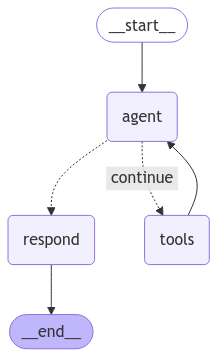

* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://0d1f1f1273d50d1070.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


<span style="color: #11cec8">Human: hello</span>

<span style="color: #ffffff">Assistant: Are you looking to buy a home? If so, I’d love to help you find your perfect match! What are you looking for in a property?</span>

<span style="color: #11cec8">Human: i want a big house close to the beach</span>

<span style="color: #ffffff">Assistant: Could you please provide me with a bit more information? Specifically, I need to know:

- **Which town are you interested in?**
- **What is your price range or budget for the property?**
- **What size home are you looking for (in square meters)?**
- **How many bedrooms and bathrooms do you want?**
- **What house features do you want (e.g., garage, backyard, pool, modern kitchen)?**
- **Are there any lifestyle preferences you would like nearby (e.g., schools, parks, restaurants, shopping)?**

This will help me find the best options for you!</span>

<span style="color: #11cec8">Human: what towns can i choose from</span>

<span style="color: #ffffff">Assistant: Here are the towns you can choose from:

1. **Wonthaggi**
2. **Inverloch**
3. **Foster**
4. **Leongatha**
5. **Traralgon**
6. **Fish Creek**
7. **Venus Bay**

Please let me know which town you're interested in, and we can narrow down your options!</span>

<span style="color: #11cec8">Human: i would like a house in Inverloch</span>

<span style="color: #ffffff">Assistant: Could you please provide the following details to help narrow down your preferences?

- **Budget**: What is your budget for the house?
- **Size**: What size of the house are you looking for (in square meters)?
- **Bedrooms**: How many bedrooms do you want?
- **Bathrooms**: How many bathrooms do you need?
- **Features**: Any specific features you would like (e.g., a backyard, garage)?
- **Lifestyle Preferences**: Any nearby amenities you prefer (e.g., schools, parks)?

This will help me find the best options for you!</span>

<span style="color: #11cec8">Human: budget is 800k , 3 bedrooms and 2 bathrooms</span>

<span style="color: #ffffff">Assistant: It seems I missed the size preference. Could you please provide the desired size of the house in square meters? The options range between 150 sqm and 300 sqm. 

Also, if you have any specific features or lifestyle preferences, feel free to share!</span>

<span style="color: #11cec8">Human: at least 200 sqm with a big backyard and close to schools for my kids</span>

--EXTRACT PREFERENCES--
location='Inverloch' budget=800000.0 size=200 bedrooms=3 bathrooms=2 features=['big backyard'] preferences=['close to schools']
---MATCH PROPERTIES---
Query: location: Inverloch, budget: 800000.0, size: 200sqm,  3 bedrooms,  2 bathrooms, features: ['big backyard'], amenities: ['close to schools']



🏠 Inverloch, Victoria - $895,000.0

Luxurious Coastal Living Awaits! 🌊🏡

Key Features:
• 4 bedrooms, 3 bathrooms
• 280 sqm
• This luxurious 4-bedroom home is just minutes from the pristine beaches of Inverloch. Features include expansive living spaces, a gourmet kitchen, and a private outdoor entertainment area with sea views. The master suite includes an ensuite bathroom and a walk-in wardrobe, offering comfort and elegance.
• Inverloch boasts stunning beaches and a relaxed coastal lifestyle. With local markets, cafes, and art galleries nearby, the suburb is perfect for those who appreciate nature and community. Watch breathtaking sunsets over the water or explore the local hiking trails in the surrounding areas.

Don't miss out on this dream home! Contact us today to schedule a private viewing!

🏠 Inverloch, Victoria - $999,000.0

Your Luxurious Retreat by the Sea! 🌅🌴

Key Features:
• 4 bedrooms, 3 bathrooms
• 320 sqm
• A sprawling 4-bedroom home that defines luxury living. This property features an expansive courtyard, beautifully landscaped gardens, and high-end appliances throughout. Ideal for families who love to entertain and enjoy outdoor living.
• Inverloch is a popular seaside community known for its beautiful beaches and relaxed lifestyle. With vibrant local markets, friendly restaurants, and breathtaking walking trails, this suburb is perfect for those who love the outdoors and community spirit.

Seize the opportunity to own this stunning property! Reach out to us for more details!

🏠 Inverloch, Victoria - $450,000.0

Charming Cottage Living Awaits! 🏖️🌼

Key Features:
• 2 bedrooms, 1 bathrooms
• 170 sqm
• This delightful 2-bedroom beach cottage offers a cozy escape within walking distance to the beach. Features include a simple layout, lovely outdoor area, and potential for upgrades, making it perfect for first-time buyers.
• Inverloch provides a picturesque coastal lifestyle with beautiful beaches and scenic walks. This friendly community offers local markets and cafes, making it a great spot for those who appreciate both nature and social activities.

Take the first step towards your dream beach home! Contact us today!


<span style="color: #11cec8">Human: can you compare listing 1 and 2 and tell me the benefits</span>

<span style="color: #ffffff">Assistant: Sure! Here’s a comparison of the first two listings in Inverloch along with their benefits:

### Listing 1: Luxurious Coastal Living
- **Price:** $895,000
- **Bedrooms:** 4
- **Bathrooms:** 3
- **Size:** 280 sqm
- **Key Features:**
  - Expansive living spaces
  - Gourmet kitchen
  - Private outdoor entertainment area with sea views
  - Master suite with ensuite bathroom and walk-in wardrobe

#### Benefits:
- **More Bedrooms:** With 4 bedrooms, this home is ideal for larger families or for those needing extra space for guests or a home office.
- **Additional Bathroom:** The 3 bathrooms provide convenience, especially for families, reducing morning congestion.
- **Outdoor Entertainment:** The private outdoor area with sea views is perfect for entertaining guests or enjoying family gatherings.
- **Luxurious Amenities:** The gourmet kitchen and spacious living areas offer a high-end living experience, making it an excellent choice for those who appreciate luxury.

---

### Listing 2: Your Luxurious Retreat by the Sea
- **Price:** $999,000
- **Bedrooms:** 4
- **Bathrooms:** 3
- **Size:** 320 sqm
- **Key Features:**
  - Expansive courtyard and beautifully landscaped gardens
  - High-end appliances throughout
  - Ideal for entertaining and outdoor living

#### Benefits:
- **Larger Size:** At 320 sqm, this home provides even more space for families, allowing for flexible layouts and more rooms for various activities.
- **Landscaped Gardens:** The beautifully landscaped gardens enhance the outdoor living experience and provide a serene environment for relaxation.
- **High-End Appliances:** The presence of high-end appliances signifies a modern and luxurious lifestyle, making daily living more convenient and enjoyable.
- **Ideal for Entertaining:** The spacious layout and outdoor features are perfect for hosting gatherings, making it an excellent choice for those who enjoy entertaining.

---

### Summary of Comparison:
- **Space:** Listing 2 offers more square footage, which may be beneficial for families needing extra room.
- **Price:** Listing 1 is more budget-friendly and offers luxury features at a lower cost.
- **Outdoor Features:** Both listings have outdoor spaces, but Listing 2 emphasizes landscaped gardens, while Listing 1 has a focus on sea views.
- **Luxury Amenities:** Both homes come with high-end features, but Listing 2 may appeal more to those looking for a more expansive luxury experience.

Ultimately, your choice may depend on your budget, the importance of space, and your lifestyle preferences regarding outdoor living and entertaining. If you have any specific priorities, please let me know!</span>

<span style="color: #11cec8">Human: tell me more about listing 1</span>

<span style="color: #ffffff">Assistant: ### Listing 1: Luxurious Coastal Living

- **Price:** $895,000
- **Location:** Inverloch, Victoria
- **Bedrooms:** 4
- **Bathrooms:** 3
- **Size:** 280 sqm

#### Key Features:
1. **Expansive Living Spaces:** 
   - The property boasts generous living areas, providing plenty of room for family activities and gatherings. The open design enhances natural light and creates a welcoming atmosphere.

2. **Gourmet Kitchen:** 
   - The kitchen is equipped with high-end appliances and ample counter space, making it ideal for cooking enthusiasts. It's designed for both functionality and style, perfect for preparing meals and entertaining guests.

3. **Private Outdoor Entertainment Area:** 
   - This home features a private outdoor space that is perfect for entertaining or relaxing. Enjoy sea views while hosting barbecues, family gatherings, or simply unwinding after a long day.

4. **Master Suite:** 
   - The master bedroom includes an ensuite bathroom and a walk-in wardrobe, offering both luxury and convenience. This private retreat is designed for comfort and relaxation.

5. **Additional Bedrooms and Bathrooms:** 
   - With a total of 4 bedrooms and 3 bathrooms, this property is ideal for larger families or those who often host guests. The additional bathrooms help reduce morning congestion.

#### Community and Lifestyle:
- **Proximity to Beaches:** 
   - Located just minutes from the pristine beaches of Inverloch, this home is perfect for beach lovers. Enjoy swimming, sunbathing, and various water activities.

- **Local Amenities:** 
   - Inverloch offers a relaxed coastal lifestyle with local markets, cafes, and art galleries. Residents can enjoy the charm of a close-knit community with access to various amenities.

- **Natural Beauty:** 
   - The area is known for its stunning natural landscapes, including scenic walking trails and breathtaking sunsets over the water. Perfect for those who appreciate outdoor activities and nature.

#### Summary:
This luxurious coastal home in Inverloch is an excellent choice for families seeking a spacious and elegant living environment. With its high-end features, ample outdoor space, and close proximity to beautiful beaches, it offers a perfect blend of comfort and coastal lifestyle.

If you're interested in scheduling a viewing or need more information about this property, feel free to ask!</span>

In [9]:
from langchain_openai import ChatOpenAI, OpenAIEmbeddings
import gradio as gr
from gradio import ChatMessage, ChatInterface


from langchain_core.messages.ai import AIMessage
from langchain_core.messages.human import HumanMessage
from langchain_core.messages.base import BaseMessage
from langchain_core.messages.tool import ToolMessage 

from langchain.schema import BaseChatMessageHistory
from langchain_core.messages import RemoveMessage, AnyMessage, filter_messages

from langgraph.graph import StateGraph, END
from langgraph.prebuilt import ToolNode
from langgraph.checkpoint.memory import MemorySaver

from langgraph.graph.message import add_messages


from pydantic import BaseModel, Field, TypeAdapter
from typing import Literal, Sequence, Union
from langchain_core.tools import tool
from langgraph.graph import MessagesState

import json

#------------------------------------------

from typing import List, Dict,AnyStr, Annotated,Optional
from typing_extensions import TypedDict

from langchain_core.messages.system import SystemMessage

from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.output_parsers import JsonOutputParser

import uuid

from pydantic.dataclasses import dataclass
from pydantic.tools import parse_obj_as


from pprint import pp as pp

from IPython.display import Markdown, display

################################################################################################
#table
class Listing(LanceModel):
    location: str
    price: float
    bedrooms: int
    bathrooms: int
    size: int
    property_description: str
    suburb_description: str
    combined : str
    vector: Vector(1536) 
    
class Property(BaseModel):
    location: str = Field(..., description="The location of the property, including town and address.")
    price: float = Field(..., gt=0, description="The price of the property in dollars.")
    size: int = Field(..., gt=0, description="The size of the property in square meters (sqm).")
    bedrooms: int = Field(..., ge=1, description="The number of bedrooms in the property.")
    bathrooms: int = Field(..., ge=1, description="The number of bathrooms in the property.")
    property_description: str = Field(..., description="A detailed description of the property.")
    suburb_description: str = Field(..., description="A description of the suburb or neighborhood where the property is located.")
    highlights: List[str] = Field(default_factory=list, description="Key highlights or features of the property (e.g., pool, modern kitchen).")
    tag_line: str = Field(..., description="A catchy tag line summarizing the property (e.g., 'Modern Luxury with Ocean Views').")
    call_to_action: str = Field(..., description="A call-to-action message to encourage buyer engagement (e.g., 'Contact us to schedule a viewing today!').")



class PropertyListings(BaseModel):
    properties: List[Property]
    @classmethod
    def from_dict(cls, data: dict):
        cls = parse_obj_as(cls, data)
        return cls
    @classmethod
    def from_json(cls, json_data: str) -> 'PropertyListings':
        data = json.dumps(json_data)
        return cls(**data)
    


class BuyerPreferences(BaseModel):
    location: str = Field(..., description="Preferred town for the property (e.g., Wonthaggi, Inverloch).")
    budget: Optional[float] = Field(..., ge=MIN_PRICE, le=MAX_PRICE, description="Maximum budget for the property in dollars.")
    size: Optional[int] = Field(MIN_SQM, ge=MIN_SQM, le=MAX_SQM, description="Desired size of the property in square meters (sqm).")
    bedrooms: Optional[int] = Field(min(Bedrooms), ge=min(Bedrooms), le=max(Bedrooms), description="Minimum number of bedrooms required.")
    bathrooms: Optional[int] = Field(min(Bathrooms), ge=min(Bathrooms), le=max(Bathrooms), description="Minimum number of bathrooms required.")
    features: Optional[List[str]] = Field(default_factory=list, description="Desired features of the property (e.g., backyard, garage).")
    preferences: Optional[List[str]] = Field(default_factory=list, description="Lifestyle preferences for the property (e.g., proximity to schools, parks).")



# Inherit 'messages' key from MessagesState, which is a list of chat messages
class AgentState(TypedDict):
    """
    A state class to track agent preferences, results, and matches during a session.
    Inherits the `messages` key from MessagesState.
    """
    messages: Annotated[List[AnyMessage], add_messages] = Field(default_factory=list, description="List of all messages in the conversation.")
    #messages: Annotated[list, add_messages] = Field(default_factory=list, description="List of all messages in the conversation.")
    #input_text: Optional[str] = Field(default="", description="Text input by the user.")
    preferences: Optional[Dict] = Field(default_factory=lambda: {"location": "unknown", "budget": {MIN_PRICE}}, description="Structured buyer preferences extracted from user input.")
    preferences_extracted: Optional[bool] = Field(description="Flag indicating if preferences have been extracted from user input.")
    homes_matched: Optional[List[Dict]] = Field(default_factory=list, description="List of matched properties.") 
    results: Optional[List[Dict]] = Field(default_factory=list, description="List of property match results.")
    formatted_descriptions: Optional[str] = Field(default="", description="Formatted property descriptions tailored to user preferences.")
    final_response: Optional[Dict] = Field(default_factory=dict, description="Final structured response from the agent.")
    #history : Optional[Annotated[Sequence[BaseMessage], add_messages]] = Field(default_factory=list, description="List of all messages in the conversation.")
    
    def __init__(self):
        super().__init__()
        self.messages = []
        self.preferences = {"location": "unknown", "budget": {MIN_PRICE}}
        self.preferences_extracted = False
        self.homes_matched = []
        self.results = []
        self.formatted_descriptions = ""
        self.final_response = {}
        #self.history = []
        
        
class UserDetails(TypedDict):
    name: str = Field(description="Name of the user.")
    phone: Optional[str] = Field(description="Phone number of the user.")
    email: str = Field(description="Email address of the user.")
    budget: Optional[List[int]] = Field(description="Budget of the user.")
    size: Optional[List[int]] = Field(description="Size of the user's desired home.")
    bedrooms: Optional[List[int]] = Field(description="Number of bedrooms of the user's desired home.")
    bathrooms: Optional[List[int]] = Field(description="Number of bathrooms of the user's desired home.")
    location: Optional[str] = Field(description="Location of the user's desired home.")
    features: Optional[List[str]] = Field(description="Features of the user's desired home.")
    preferences: Optional[List[str]] = Field(description="Preferences of amentities of the user's desired home.")
    homes_matched: Optional[List[str]] = Field(description="Homes matched by the user.")
    formatted_descriptions: Optional[str] = Field(description="Formatted descriptions of the user's desired home.")
    preferences_matched: Optional[List[str]] = Field(description="Preferences matched by the user.")


class UserPreferences(TypedDict):
    location: str
    budget: List[int]

###############################################################################################################
def printStyledText(text: str, role: str = "general", history: Union[BaseChatMessageHistory, None] = None):
    """
    Print styled Markdown text based on the role or chat history.

    Args:
        text (str): The text to display.
        role (str): The role of the speaker ("agent", "human", or "general").
        history (BaseChatMessageHistory, optional): A chat message history object for displaying chat history.
    """
    if history:
        # Print history messages in styled format
        for msg in history.messages:
            display(Markdown(f'> <span style="color: #c81cf6">{msg}</span>'))
    else:
        # Determine the style based on the role
        if role == "agent":
            formatted_text = f'<span style="color: #ffffff">Agent: {text}</span>'
        elif role == "human":
            formatted_text = f'<span style="color: #11cec8">Human: {text}</span>'
        else:
            # Default for general Markdown text
            formatted_text = text
        
        # Display the formatted text
        display(Markdown(formatted_text))
        
def print_openai_message(message: dict):
    """
    Print a message in styled Markdown format based on OpenAI's message format.

    Args:
        message (dict): A dictionary containing `role` and `content` keys. 
                        Example: {"role": "agent", "content": "How can I help you?"}
    """
    # Validate input format
    if not isinstance(message, dict) or "role" not in message or "content" not in message:
        raise ValueError("Message must be a dictionary with 'role' and 'content' keys.")

    role = message["role"]
    content = message["content"]

    # Define styles for different roles
    role_styles = {
        "agent": '<span style="color: #ffffff">Agent: {}</span>',
        "human": '<span style="color: #11cec8">Human: {}</span>',
        "system": '<span style="color: #ff5733">System: {}</span>',
        "assistant": '<span style="color: #ffd700">Assistant: {}</span>',
    }

    # Use the role style if available, otherwise default to plain Markdown
    formatted_text = role_styles.get(role, "{}").format(content)

    # Display the styled Markdown text
    display(Markdown(formatted_text))

def print_langchain_message(message: BaseMessage):
    """
    Print a LangChain message in styled Markdown format.

    Args:
        message (BaseMessage): A LangChain message object (e.g., AIMessage, HumanMessage, SystemMessage).
    """
    # Define styles for different message types
    role_styles = {
        AIMessage: '<span style="color: #ffffff">Assistant: {}</span>',
        HumanMessage: '<span style="color: #11cec8">Human: {}</span>',
        SystemMessage: '<span style="color: #ff5733">System: {}</span>',
    }

    # Identify the message type and apply the appropriate style
    formatted_text = role_styles.get(type(message), "{}").format(message.content)

    # Display the styled Markdown text
    display(Markdown(formatted_text))
###############################################################################################################


system_template = f"""
You are HomeMatch, an AI real estate assistant specifically for homes for sale. 
Conversation should be personal, friendly and conversational, but focused on gathering relevant information.
Help users find their perfect home by understanding their preferences and matching them with suitable properties. 
Be professional and detailed in your responses. 
Always maintain context of the conversation and previous preferences discussed. 
If the user asks to get more information on a property or to schedule or arrange a viewing for a property ask them to contact level3@homematch.com.au or phone 0412345678
If the user hasn't provided enough details about their home preferences, ask helpful questions to understand their needs better. 
Budget should be greater than or equal to {MIN_PRICE} and less than or equal to {MAX_PRICE}.
Size should be greater than or equal to {MIN_SQM} and less than or equal to {MAX_SQM}.
Number of bedrooms should be greater than or equal to {min(Bedrooms)} and less than or equal to {max(Bedrooms)} .
Number of bathrooms should be greater than or equal to {min(Bathrooms)} and less than or equal to {max(Bathrooms)} .
Focus on key aspects like:
- Location
- Budget
- Size of the property in square meters (sqm)
- Number of bedrooms
- Number of bathrooms
- House features (e.g., kitchen, balcony, garage, backyard, garden etc.)
- Lifestyle prefereces (e.g., proximity to schools, beach, supermarkets etc.)
[
    location: str  
    budget: float
    size: int
    bedrooms: int
    bathrooms: int
    features: List[str]
    preferences: List[str]
]
Location must be one of these towns : {Location}
Example questions:
[
"Which town are you interested in?",
"What is your price range or budget for the property?",
"What size home are you looking for ie square meterage?",
"How many bedrooms and bathrooms do you want"
"What house features do you want (e.g., garage, backyard, pool, modern kitchen, home office, gym)?",
"Are there any lifestyle preferences you would like nearby (e.g., schools, parks, restaurants, shopping, hospitals)?",
]
Multiple questions should always be formatted in bullet points with markdown.
You should continue to ask questions until you have a good idea of the buyer's preferences, including: location, budget, size in sqm, number of bedrooms, number of bathrooms , house features and lifestyle preferences.
If the user has provided enough details about their home preferences, match them with suitable properties. 
Use tools in this order:
1. call the extract_preferences tool to extract structured buyer preferences from user input
2  call the match_properties tool to match properties to buyer preferences
Do not modify the response from match_properties tool before returning it to the user.
Finally return descriptions of properties matching user preferences back to the user.
"""

print(system_template)


extract_preferences_template = """
Extract buyer preferences from the input.
If the input doesn't contain enough information, return None. 
Format as JSON with these fields:
[
    location: str  
    budget: float
    size: int
    bedrooms: int
    bathrooms: int
    features: List[str]
    preferences: List[str]
]
"""



#################################################################################################################################

@tool
def extract_preferences(state:AgentState) -> Optional[BuyerPreferences]:
    
    """Extract structured buyer preferences from user input.
    
        - Input: User's conversational input.
        - Output: A dictionary with the following fields:
            - location: (str)
            - budget: (float)
            - size: (int)
            - bedrooms: (int)
            - bathrooms: (int)
            - features: (List[str])
            - preferences: (List[str])
    
    """
    print("--EXTRACT PREFERENCES--")

    prompt_template = ChatPromptTemplate.from_messages([("system", system_template),*[(msg.type, msg.content) for msg in state['messages']]])
    #try:
        
    #parser = JsonOutputParser(pydantic_object=BuyerPreferences)
    
    #chain = prompt | model | parser
    
    #print(prompt_template)
    
    prompt = prompt_template.invoke(state, config=config)

    response = model_with_structured_output.invoke(prompt, config=config)
    
    
    #preferences = chain.invoke({"input": state['messages']})
    agent_state['preferences_extracted'] = True
    graph.update_state(config, {"preferences_extracted": True})

    print(response)
    
    return {"messages": [response], "extract_preferences": True}


@tool
def match_properties(buyer_preferences : BuyerPreferences) -> str:
    """Match properties to buyer preferences.
            
        Input: Structured preferences from `extract_preferences`.
        Output: A description properties that meet the user's criteria.
    
    """
    
    print("---MATCH PROPERTIES---")
    
    
    try:
        embeddings = OpenAIEmbeddings()
            
        query_from_dict = f"location: {buyer_preferences.location}, "\
                f"budget: {buyer_preferences.budget}, "\
                f"size: {buyer_preferences.size}sqm, "\
                f" {buyer_preferences.bedrooms} bedrooms, "\
                f" {buyer_preferences.bathrooms} bathrooms, "\
                f"features: {buyer_preferences.features}, "\
                f"amenities: {buyer_preferences.preferences}"    

        print(f'Query: {query_from_dict}')
        query_vector = embeddings.embed_query(query_from_dict)
        results = table.search(query_vector).limit(3).to_list() 
        
    except Exception as e:
        print(f"Error matching properties: {e}")
        pass

    details = []

    listing_num = 1
    for r in results:
        details.append(f'Listing {listing_num}')
        for f in r:
            if f == 'combined':
                details.append(f'{f}:{r[f]}')
        listing_num += 1
        details.append('---')

    #schema = json.dumps(Property.model_json_schema(mode='serialization'))
    
    str_details = [str(element) for element in details]
    
    structured_llm = model.with_structured_output(PropertyListings)

    system_template = f"""
    You are an expert real estate salesperson and an expert copywriter who has been tasked with writing a description for a property.
    Rewrite property description for buyer being as verbose as possible also include emoji characters for flair
    Properties: {details}
    Response in JSON format each listing should include a unique tag line, summary sales pitch and call to action
        class Property(BaseModel):
        location: str = Field()
        price: float = Field()
        bedrooms: int = Field()
        bathrooms: int = Field()
        size: int = Field()
        property_description: str  = Field()
        suburb_description: str  = Field()
        highlights: List[str] = Field()
        tag_line: str = Field()
        call_to_action: str = Field()
        """
        

    prompt_template = ChatPromptTemplate.from_messages(
        [("system", system_template), ("human", "{details}")]
        )

    prompt = prompt_template.invoke({"details": str_details}, config=config)
    chain = prompt_template | structured_llm #| parser

    chain_response = chain.invoke(prompt, config=config)

    homes_matched = TypeAdapter(PropertyListings).validate_python(chain_response)
    #print(homes_matched.properties[0].location)

    formatted_descriptions = []

    for prop in homes_matched.properties:
        formatted_descriptions += format_property(prop)

    agent_state['homes_matched'] = homes_matched
    agent_state['formatted_descriptions'] = ''.join(formatted_descriptions)

    return ''.join(formatted_descriptions) 



def format_property(prop: Property) -> str:
        """Format property details with emphasis on matching preferences."""

        formatted_string = f"""
🏠 {prop.location} - ${prop.price:,}

{prop.tag_line}

Key Features:
• {prop.bedrooms} bedrooms, {prop.bathrooms} bathrooms
• {prop.size:,} sqm
• {prop.property_description}
• {prop.suburb_description}

{prop.call_to_action}
"""

        return formatted_string


#####################################################################################################################################

tools = [extract_preferences, match_properties]

model_version = "gpt-4o-mini" #"gpt-4o"

model = ChatOpenAI(model=model_version, temperature=0.7, streaming=True)

model_with_tools = model.bind_tools(tools)

model_with_structured_output = model.with_structured_output(BuyerPreferences)

########################################################################################################################################

def get_messages_info(messages):
    return [SystemMessage(content=system_template)] + messages


# Define the function that calls the model
def call_model(state: AgentState):
    
    '''
    print('----------')
    print('call_model')
    print('---------')    

    print(f'AGENT STATE PREFERENCES EXTRACTED : {agent_state["preferences_extracted"]}') 
    '''
    
    messages = state["messages"]

    response = model_with_tools.invoke(messages, config=config)
    
    #print(f'Call model response : {response}')

    return {"messages": [response], "preferences_extracted": state["preferences_extracted"]}


# Define the function that responds to the user
def respond(state: AgentState):
    
    '''
    print('-------')
    print('Respond Function Execution')
    print('-------')

    # Log the current state of preferences extraction
    print(f'AGENT STATE PREFERENCES EXTRACTED: {state["preferences_extracted"]}')
    '''

    # Retrieve the conversation messages and the last message
    messages = state["messages"]
    last_message = messages[-1]  # Last message in the conversation

    # Create a prompt template based on the current messages
    prompt_template = ChatPromptTemplate.from_messages(get_messages_info(messages))
    prompt = prompt_template.invoke(state, config=config)

    # Check if preferences have been extracted
    if state["preferences_extracted"]:
        # If preferences are already extracted, directly return the last message as the final response
        return {"final_response": [last_message]}
    else:
        # Otherwise, generate a response using the model with tools
        response = model_with_tools.invoke(prompt, config=config)

    # Check if the second-to-last message was a tool message
    if isinstance(messages[-2], ToolMessage):
        #print('TOOL WAS CALLED')
        response = messages[-2]  # Use the tool message as the response

    # Log the last two messages for debugging
    '''
    print('Last Two Messages:')
    for id, message in enumerate(messages[-2:], start=-2):
        print(f'{id}: {message}')
    '''
    
    # Return the final response
    return {"final_response": [response]}





# Define the function that determines whether to continue or not
def should_continue(state: AgentState):

    messages = state["messages"]
    last_message = messages[-1]

    # If there is no function call, then we respond to the user
    if not last_message.tool_calls:
        return "respond"
    # Otherwise if there is, we continue
    else:
        #print(f'should_continue: Last Message : {last_message}')
        return "continue"



def delete_last_messages(state):
    messages = state["messages"]
    if len(messages) > 1:
        return {"messages": [RemoveMessage(id=m.id) for m in messages[:-1]]}
    
###########################################################################################################################################

def display_workflow_graph(app):
    from IPython.display import Image, display
    from PIL import Image as PILimg

    try:
        display(Image(app.get_graph().draw_mermaid_png()))
    except Exception:
        # This requires some extra dependencies and is optional
        pass  

def dict2obj(dict1, obj):

    # using json.loads method and passing json.dumps
    # method and custom object hook as arguments
    return json.loads(json.dumps(dict1), object_hook=obj)


############################################################################################################################################

# Define a new graph
workflow = StateGraph(AgentState)

# Define the two nodes we will cycle between
workflow.add_node("agent", call_model)
workflow.add_node("respond", respond)
workflow.add_node("tools", ToolNode(tools))

# Set the entrypoint as `agent`
# This means that this node is the first one called
workflow.set_entry_point("agent")

# We now add a conditional edge
workflow.add_conditional_edges(
    "agent",
    should_continue,
    {
        "continue": "tools",
        "respond": "respond",
    },
)

workflow.add_edge("tools", "agent")
workflow.add_edge("respond", END)

memory = MemorySaver()
graph = workflow.compile(memory)

display_workflow_graph(graph)

config = {"configurable": {"thread_id": str(uuid.uuid4())}}

agent_state = AgentState(preferences_extracted=False)


##############################################################################################


def predict(message:HumanMessage, history):
    
    print_langchain_message(HumanMessage(message))
    
    agent_state["input_text"] = message
    agent_state['messages'] = [("human", message)]
    #print(f'PREFERENCES EXTRACTED : {agent_state["preferences_extracted"]}')
    
    history_langchain_format = []
    
    
    for msg in history:
        if msg['role'] == "user":
                history_langchain_format.append(HumanMessage(content=message))
        elif msg['role'] == "assistant":
                history_langchain_format.append(AIMessage(content=message))
        #print(msg)
    
    history_langchain_format.append(HumanMessage(content=message))
    
    
    if message is not None:
        history_langchain_format.append(HumanMessage(content = message))
        
        
        partial_message = ""
        
        response_list = graph.invoke(agent_state, config=config)["final_response"]

        for response in response_list:
            print_langchain_message(response)
            # ChatInterface struggles with rendering stream
            for chunk in response.content:
                partial_message += chunk
                
                yield partial_message 
    



def create_chat_interface():
    
    chat_interface = ChatInterface(
        predict,
        type='messages',
        title="HomeMatch: Your Personal Real Estate Assistant",
        description=f"""Welcome to HomeMatch! I'm here to help you find your perfect home.\n
        Tell me about your preferences, including:
        • Budget
        • Desired location(s) - We currently have listings in the towns of {", ".join(Location)} 
        • Number of bedrooms and bathrooms 
        • Must-have house features (parking, gym, etc.)
        • Lifestyle needs (proximity to schools, transit, etc.)""",
        examples=[
            ["I'm looking for a modern family home in Inverloch close to the beach, with at least 3 bedrooms and 2 bathrooms. My budget is $800,000. Need parking and a garden and close to shops and a kindergarten"],
            ["Show me luxury properties on the coast with a modern kitchen and fireplace, at least 2 bedrooms, and a budget up to $900,000."],            
            ["I need a home in a quiet neighborhood in Wonthaggi, close to schools, with 4 bedrooms and at least 2 bathrooms. Budget up to $700,000. Prefer a large backyard and 2 car garage"],
            ["I want to buy a house in Foster close to the hospital thats close to the supermarket under 600k"]
        ],
        theme="ocean"
        ) 
    return chat_interface


demo = create_chat_interface()
#demo.launch()
demo.launch(share=True)
